### Before submitting the assignment, add your UNCC username to the end of the file name.<br>Ex: ITCS3162_final_hw_jmelto30.ipynb

# Part 1: Classification

For this assignment, you will fit classification models to predict the political party of U.S. Representatives using past voting records.  

The dataset for this analysis is *voting_data.csv*.

The **Class Name** column contains the political party for each representative, which will be our label column for this analysis.  
The remaining columns will form our feature set.

## Read in the data

In the code cell below, read the voting data into a pandas dataframe.

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('voting_data.csv')
data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Clean up the data

Encode features as numeric values:
- Replace 'y' votes with 1
- Replace 'n' votes with 0
- Replace '?' votes with NaN (use np.nan)

In [3]:
data.replace(to_replace=['n','y','?'], value=[0,1,np.nan], inplace=True)
data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


Encode labels as numeric values:
- Replace 'republican' with 1
- Replace 'democrat' with 0

In [4]:
data.replace(to_replace=['republican','democrat'], value=[1,0], inplace=True)
data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,0,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


## Handling missing values

Replace the missing values with a third category (use 2).

In [5]:
data.replace(to_replace=[np.nan], value=[2], inplace=True)
data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0
1,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0
2,0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0


**Question:** What do missing values in this dataset represent? Why does retaining the missing values as a third category make sense for this data?

It is a vote that the candidate did not respond to, if they did not respond it could represent they are on the fence about their decision which is important to know in this case.

## Split the data into feature and label sets

Create feature and label sets of data with the appropriate columns.

In [6]:
data.shape #17
feature_names = data.columns.tolist()
#feature_names.pop(0) #remove Class-Name because it isn't a feature
features = []
label = []

#435
#X is the features, Y is the label
X = np.array(data.drop('Class Name',1))
X.shape #16

Y=np.array(data['Class Name'])
Y.shape #1

(435,)

## Divide features and labels into training and test sets

Split the features and labels into training and test datasets.  
Use 20% of the data as a test set.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2, random_state = 0)
X_test.shape

(87, 16)

## Fit Decision Tree classifier

Initialize and fit a Decision Tree classifier on your training dataset.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

## Evaluate Decision Tree classifier

Use cross validation on your entire dataset (see [cross validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) or [cross val score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) documentation) to report the mean F1, precision, and recall scores across all folds.

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
scores = cross_validate(clf, X, Y, scoring=['f1','precision','recall'])
print(sorted(scores.keys()))
#print('Accuracy: ', metrics.accuracy_score(Y_test,y_pred))
print('Mean F1:',  scores['test_f1'])
print('Precision:', scores['test_precision'])
print('Recall:', scores['test_recall'])

['fit_time', 'score_time', 'test_f1', 'test_precision', 'test_recall']
Mean F1: [0.97058824 0.98507463 0.95522388 0.90625    0.875     ]
Precision: [0.97058824 1.         0.96969697 0.93548387 0.90322581]
Recall: [0.97058824 0.97058824 0.94117647 0.87878788 0.84848485]


## Fit Naive Bayes classifier

**Question:** Look at scikit learn's documentation for [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) and the lecture slides for Naive Bayes. Given the data type of our feature columns, which type of Naive Bayes classifier is appropriate for our dataset?
Categorical Bayes

Initialize and fit a Naive Bayes classifier on your training dataset. 

In [12]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train,Y_train)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

## Evaluate Naive Bayes classifier

Use cross validation on your entire dataset (see [cross validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) or [cross val score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) documentation) to report the mean F1, precision, and recall scores across all folds.

In [13]:
scores = cross_validate(cnb, X, Y, scoring=['f1','precision','recall'])
print(sorted(scores.keys()))
#print('Accuracy: ', metrics.accuracy_score(Y_test,y_pred))
print('Mean F1:',  scores['test_f1'])
print('Precision:', scores['test_precision'])
print('Recall:', scores['test_recall'])

['fit_time', 'score_time', 'test_f1', 'test_precision', 'test_recall']
Mean F1: [0.88888889 0.82666667 0.92307692 0.92307692 0.81081081]
Precision: [0.84210526 0.75609756 0.96774194 0.9375     0.73170732]
Recall: [0.94117647 0.91176471 0.88235294 0.90909091 0.90909091]


**Question:** Which classifier model performed better on the voting dataset? Why do you think this is?

Decision Tree, it is better for predicting categorical data

## *Bonus*

Predict the class label using your test dataset with both models.

Report the classification report and accuracy for your model. See [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

**Question:** Which classifier model performed better on the test dataset?

***

# Part 2: Regression

For this assignment, you will fit regression models to predict the daily count of bike riders.

The dataset for this analysis is *day_clean.csv*.

The **cnt** column contains the total count of bike riders on a given day, which will be our label column for this analysis.

## Read in the data

In the code cell below, read the daily bike data into a pandas dataframe.

In [14]:
import pandas as pd
import numpy as np
data = pd.read_csv('day_clean.csv')
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## Individual feature selection

Choose three columns from the dataset that you think will be the best predictors of bike ridership count.  
Look at the *Readme.txt* for more information about the dataset.

**Question:** Justify why you selected these three columns.

Season, weather, atemp

## Split the data into feature and label sets

Create a labels dataset.  
Create your three single feature sets using each of the three columns you have selected.

In [103]:
feature_names = data.columns.tolist()
my_features = ['season','weathersit','atemp']
myData = data

res = [i for i in feature_names if i not in my_features] 
 

for column in res:
    myData = myData.drop(column,1)



#X is the features, Y is the label
X = np.array(myData)
print(X.shape) #16

Y=np.array(data['cnt'])
print(Y.shape)


(731, 3)
(731,)


## For each single feature set, divide the features and labels into training and test sets

Split the feature and label sets into training and test sets.  
Use 20% of the data as a test set.

In [95]:
from sklearn.model_selection import train_test_split
feature1_train, feature1_test, Y_train1, Y_test1 = train_test_split(X[:,0],Y,test_size = .2, random_state = 0)
feature2_train, feature2_test, Y_train2, Y_test2 = train_test_split(X[:,1],Y,test_size = .2, random_state = 0)
feature3_train, feature3_test, Y_train3, Y_test3 = train_test_split(X[:,2],Y,test_size = .2, random_state = 0)


print(feature1_train.shape)
print(Y_train1.shape)

(584,)
(584,)


## Fit simple Linear Regression models

For each of your single feature sets, initialize and fit a Linear Regression model on your training dataset.

In [96]:
from sklearn.linear_model import LinearRegression

regr1 = LinearRegression()
regr1.fit(feature1_train.reshape(-1,1),Y_train1)
print(my_features[0], "Score: " , regr1.score(feature1_test.reshape(-1,1),Y_test))

regr2 = LinearRegression()
regr2.fit(feature2_train.reshape(-1,1),Y_train2)
print(my_features[1], "Score: " , regr2.score(feature2_test.reshape(-1,1),Y_test))

regr3 = LinearRegression()
regr3.fit(feature3_train.reshape(-1,1),Y_train3)
print(my_features[2], "Score: " , regr3.score(feature3_test.reshape(-1,1),Y_test))


season Score:  0.20608232123880943
weathersit Score:  0.1460053343850003
atemp Score:  0.371195182962035


## Evaluate simple Linear Regression models

For each model, predict the ridership count using your test dataset.  
Report the mean squared error for each model on the test dataset. See [mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) documentation.

In [97]:
y_pred1 = regr1.predict(feature1_test.reshape(-1,1))
print(my_features[0], "Mean Squared: " , metrics.mean_squared_error(Y_test1,y_pred))

y_pred2 = regr2.predict(feature2_test.reshape(-1,1))
print(my_features[1], "Mean Squared: " , metrics.mean_squared_error(Y_test2,y_pred2))

y_pred3 = regr3.predict(feature3_test.reshape(-1,1))
print(my_features[2], "Mean Squared: " , metrics.mean_squared_error(Y_test3,y_pred3))


season Mean Squared:  3376645.279231899
weathersit Mean Squared:  3632161.284829516
atemp Mean Squared:  2674396.6960435878


## Simple Linear Regression scatterplot

Using the best predictive feature from your simple Linear Regression models, plot a scatterplot of that feature vs. the ridership count.  

***Bonus:*** Include the best-fit line from your model in your scatterplot.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


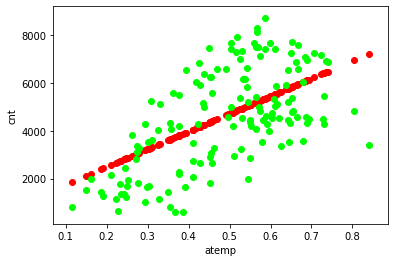

In [102]:
import matplotlib.pyplot as plt

colors = (1,0,0)

plt.scatter(feature3_test, y_pred3,c=colors)
plt.scatter(feature3_test, Y_test3,c=(0,1,0))
plt.xlabel('atemp')
plt.ylabel('cnt')

plt.show()

## Multiple Linear Regression

Create a feature set using all predictor columns.

In [114]:
feature_names = data.columns.tolist()

#X is the features, Y is the label
X = np.array(data.drop('cnt',1))
print(X.shape)

Y=np.array(data['cnt'])
print(Y.shape)

(731, 11)
(731,)


## Divide the feature set and labels into training and test sets

Split the features and labels into training and test datasets.  
Use 20% of the data as a test set.

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2, random_state = 0)
print(X_train.shape)
print(Y_train.shape)

(584, 11)
(584,)


## Fit multiple Linear Regression model

Initialize and fit a Linear Regression model on your training dataset.

In [118]:
regr = LinearRegression()
regr.fit(X_train,Y_train)
print("Score for all:" , regr.score(X_test, Y_test))

Score for all: 0.8045560823654132


## Evalute multiple Linear Regression model

Predict the ridership count using your test dataset.  
Report the mean squared error of your model on the test dataset. See [mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) documentation.

In [119]:
y_pred = regr.predict(X_test)
print("All Mean Squared: " , metrics.mean_squared_error(Y_test,y_pred))


All Mean Squared:  831250.8960188129


**Question:** Which of your models performed best overall?

The model with that uses all data. 